In [1]:
import tensorflow as tf
import CapsLayer as cp
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
tf.reset_default_graph()

input_dim = [28,28] #784

X = tf.placeholder(shape=[None, input_dim[0],input_dim[1], 1], dtype=tf.float32, name="X")
y = tf.placeholder(shape=[None, input_dim[0],input_dim[1], 1], dtype=tf.float32, name="y")

e_conv1 = tf.layers.conv2d(X, name="e_conv1", filters = 16, 
                             kernel_size = 2,strides = 1,padding = "valid", activation = tf.nn.relu)
e_conv2 = tf.layers.conv2d(e_conv1, name="e_conv2", filters = 32, 
                             kernel_size = 2,strides = 1,padding = "valid", activation = tf.nn.relu)
e_conv3 = tf.layers.conv2d(e_conv2, name="e_conv3", filters = 16, 
                             kernel_size = 2,strides = 1,padding = "valid", activation = tf.nn.relu)
e_conv4 = tf.layers.conv2d(e_conv3, name="e_conv4", filters = 32, 
                             kernel_size = 2,strides = 1,padding = "valid", activation = tf.nn.relu)
e_conv5 = cp.conv_to_caps(e_conv4, name="e_conv5", num_maps = 16,caps_dims =5,
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)

caps1,_ = cp.capsule(X,num_caps=5,caps_dims=1,batch_size=tf.shape(X)[0],name="caps1")
#caps_bridge = tf.reshape(caps1,[tf.shape(X)[0],caps1.shape[1]*caps1.shape[2]],name = "caps1_bridge")
caps_bridge = tf.reshape(caps1,[tf.shape(caps1)[0],caps1.shape[1],caps1.shape[2],1])


d_conv1 = tf.layers.conv2d(caps_bridge, name="d_conv1", filters = 16, 
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)
d_conv2 = tf.layers.conv2d(d_conv1, name="d_conv2", filters = 32, 
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)
d_conv3 = tf.layers.conv2d(d_conv2, name="d_conv3", filters = 16, 
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)
d_conv4 = tf.layers.conv2d(d_conv3, name="d_conv4", filters = 32, 
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)
d_conv5 = tf.layers.conv2d(d_conv4, name="d_conv5", filters = 16, 
                             kernel_size = 1,strides = 1,padding = "valid", activation = tf.nn.relu)
d_conv5_flat = tf.reshape(d_conv5,[tf.shape(caps1)[0],d_conv5.shape[1]*d_conv5.shape[2]*d_conv5.shape[3]])


#dense1 = tf.layers.dense(caps_bridge,100)
#dense2 = tf.layers.dense(dense1,300)
dense3 = tf.layers.dense(d_conv5_flat,input_dim[0]*input_dim[1])

output_caps = dense3
print("kk")

kk


In [6]:

output = tf.reshape(output_caps,[tf.shape(X)[0],input_dim[0],input_dim[1],1])
print(output)

Tensor("Reshape_2:0", shape=(?, 28, 28, 1), dtype=float32)


In [7]:
loss = tf.reduce_mean(tf.square(output-y))

#loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = output, labels = y)) 

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_op = optimizer.minimize(loss, name="training_op")

init = tf.global_variables_initializer()


Starting Training
Epoch: 1  Iteration: 3000/3437 (87.3%)  Loss: 0.03760

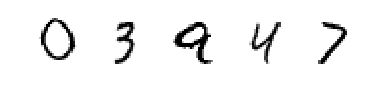

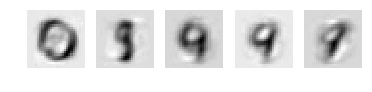

Epoch: 2  Iteration: 3000/3437 (87.3%)  Loss: 0.037289

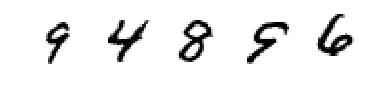

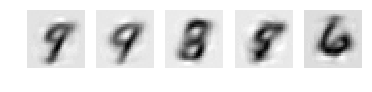

Epoch: 3  Iteration: 3000/3437 (87.3%)  Loss: 0.041825

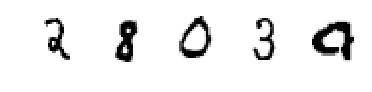

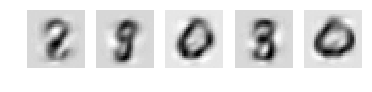

Epoch: 4  Iteration: 3000/3437 (87.3%)  Loss: 0.034488

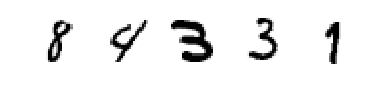

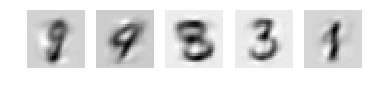

Epoch: 5  Iteration: 3000/3437 (87.3%)  Loss: 0.039866

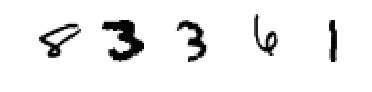

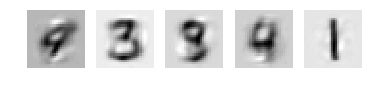

Epoch: 5  Iteration: 3437/3437 (100.0%)  Loss: 0.04140

In [8]:
n_epochs = 5
batch_size = 16

n_iterations_per_epoch = mnist.train.num_examples // batch_size
#with tf.Session() as sess:
sess = tf.Session()
print("Starting Training")
sess.run(init)
#init.run()
for epoch in range(n_epochs):
    for iteration in range(1, n_iterations_per_epoch + 1):
        X_batch,_ = mnist.train.next_batch(batch_size)
        y_batch = X_batch
        
            
        y_batch = X_batch = X_batch.reshape([-1, input_dim[0], input_dim[0], 1])
        
       # for i,x in enumerate(X_batch):
        #    X_batch[i] = np.rot90(x,iteration%3)
        y_batch = X_batch
        _,loss_train,pred = sess.run([training_op,loss,output],feed_dict={X: X_batch,
                       y: y_batch})

        print(("\rEpoch: {}  Iteration: {}/{} ({:.1f}%)  Loss: {:.5f}").format(
                  epoch+1,iteration, n_iterations_per_epoch,
                  iteration * 100 / n_iterations_per_epoch,
                  loss_train),
              end="")
        if(iteration % 3000 == 0):
            #index = 0
            n_samples = 5
            for index in range(n_samples):
                #plt.figure(figsize=(n_samples * 2, 3))
                plt.subplot(1, n_samples, index + 1)
                #plt.title("Predicted:" + str(pred[index]))
                plt.imshow(np.squeeze(y_batch[index]), cmap="binary")
                plt.axis("off")
            plt.show()
            for index in range(n_samples):

                plt.subplot(1, n_samples, index + 1)
                #plt.title("Predicted:" + str(pred[index]))
                plt.imshow(np.squeeze(pred[index]), cmap="binary")
                plt.axis("off")

            plt.show()

       # plt.imshow(np.squeeze(y_batch[0]), cmap="binary")

        #plt.imshow(y_batch[0], cmap="binary")

In [ ]:
for _ in range(100):
    X_batch,_ = mnist.train.next_batch(1)
    #X_batch = np.rot90(X_batch.reshape([ input_dim[0], input_dim[0]]),1)
    X_batch = X_batch.reshape([input_dim[0], input_dim[0]])

    for index in range(4):
        plt.subplot(1, 4, index + 1)
        plt.imshow(np.rot90(X_batch,-index), cmap="binary")
        plt.axis("off")
    plt.show()
    for index in range(4):
        plt.subplot(1, 4, index + 1)
        pred = sess.run([output],feed_dict={X: np.rot90(X_batch,-index).reshape([-1, input_dim[0], input_dim[0], 1])})
        plt.imshow(pred[0].reshape([input_dim[0], input_dim[0]]), cmap="binary")
        plt.axis("off")

    plt.show()






In [ ]:

`